# Data plot

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

GS population vs frequencies

DVR3d: model is harmonic potential.
t step is  set to 


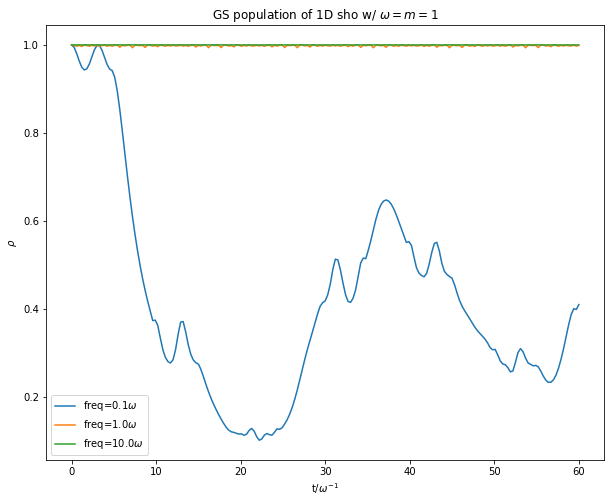

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *


def plot_dynamics(N, freq_list, stop_time=0, dim=3, model='Gaussian', auto_t_step=False):
    n, dx, stop_time, t_step, time_unit, Vmodel, t_step_is_period = param_set(
        N, stop_time, dim, model, auto_t_step)
    if model == 'Gaussian':
        freq_list = [0.02 * 10.**i for i in range(0, 3)]
        freq_unit = '$V_0/\hbar$'
        xlabel = 't/s'
        title = 'GS population of 3D {} w/ exp parameters'.format(model)
    elif model == 'sho':
        freq_list = [10.**i for i in range(-1, 2)]
        freq_unit = '$\omega$'
        xlabel = 't/$\omega^{-1}$'
        title = 'GS population of 1D {} w/ $\omega=m=1$'.format(model)

    np.set_printoptions(precision=2, suppress=True)
    data = [
        np.loadtxt('../output/{} {} {:g} {}.csv'.format(
            n, dx, freq_list[i], model),
                   dtype=float,
                   delimiter=',') for i in range(len(freq_list))
    ]

    f = plt.figure(figsize=[10, 8])
    for i in range(len(freq_list)):
        plt.plot(data[i][:, 0],
                 data[i][:, 1],
                 label='freq={}{}'.format(freq_list[i], freq_unit))
    plt.title(title)
    plt.legend()
    # plt.savefig('3D_{}.png'.format(model))
    plt.xlabel(xlabel)
    plt.ylabel('$\\rho$')


plot_dynamics(15, 60, dim=1, model='sho')
# plot_dynamics(10, 'Gaussian')

Finer frequencies

DVR3d: model is Gaussian/tweezer potential.
t step is set to: 6.6e+04.


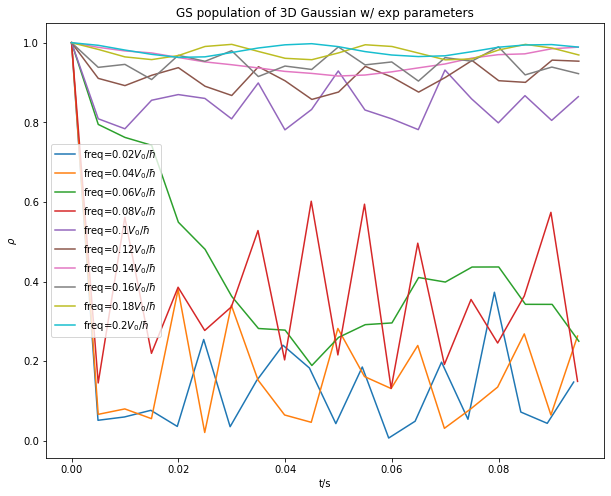

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *


def plot_dynamics(N, freq_list, stop_time=0, dim=3, model='Gaussian', auto_t_step=False):
    n, dx, stop_time, t_step, time_unit, Vmodel, t_step_is_period = param_set(
        N, stop_time, dim, model, auto_t_step)
    if model == 'Gaussian':
        freq_unit = '$V_0/\hbar$'
        xlabel = 't/s'
        title = 'GS population of 3D {} w/ exp parameters'.format(model)
    elif model == 'sho':
        freq_unit = '$\omega$'
        xlabel = 't/$\omega^{-1}$'
        title = 'GS population of 3D {} w/ $\omega=m=1$'.format(model)

    np.set_printoptions(precision=2, suppress=True)
    data = [
        np.loadtxt('../../output/{} {} {:g} {}.csv'.format(
            n, dx, freq_list[i], model),
                   dtype=float,
                   delimiter=',') for i in range(len(freq_list))
    ]

    f = plt.figure(figsize=[10, 8])
    for i in range(len(freq_list)):
        plt.plot(data[i][:int(data[i].shape[0] / 10), 0],
                 data[i][:int(data[i].shape[0] / 10), 1],
                 label='freq={:.2}{}'.format(freq_list[i], freq_unit))
    plt.title(title)
    plt.legend()
    plt.savefig('3D_{}.png'.format(model))
    plt.xlabel(xlabel)
    plt.ylabel('$\\rho$')


freq_list = np.arange(0.02, 0.22, 0.02).tolist()
plot_dynamics(10, freq_list, model='Gaussian')


In [8]:
print(105 * np.pi * 2 * 0.08)
105 * np.pi * 2 * 0.1

52.77875658030853


65.97344572538566

GS population vs grid point parameter

DVR3d: model is Gaussian/tweezer potential.
Time step is not driving period. It is set to: 0.1.
DVR3d: model is Gaussian/tweezer potential.
Time step is not driving period. It is set to: 6.6e+04.
DVR3d: model is Gaussian/tweezer potential.
Time step is not driving period. It is set to: 4.3e+10.
DVR3d: model is Gaussian/tweezer potential.
Time step is not driving period. It is set to: 2.8e+16.
DVR3d: model is Gaussian/tweezer potential.
Time step is not driving period. It is set to: 1.9e+22.


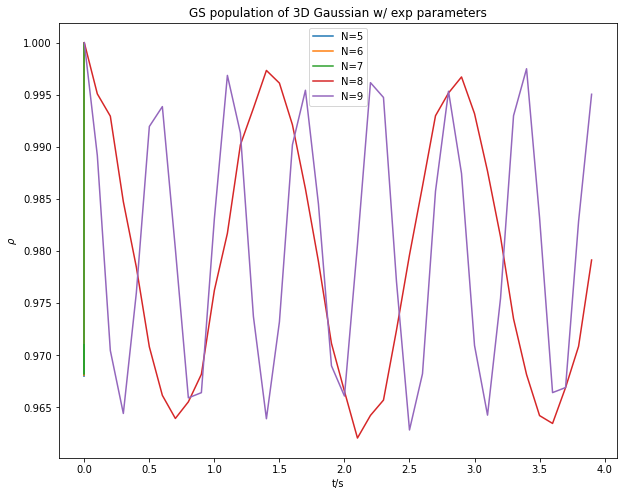

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *


def plot_dynamics(N_list,
                  freq,
                  stop_time=0,
                  length=1,
                  dim=3,
                  model='Gaussian',
                  auto_t_step=False):
    n_list = []
    dx_list = []
    for N in N_list:
        n, dx, stop_time, t_step, time_unit, Vmodel, t_step_is_period = param_set(
            N, stop_time, dim, model, auto_t_step)
        n_list.append(n)
        dx_list.append(dx)
        if model == 'Gaussian':
            freq_unit = '$V_0$'
            xlabel = 't/s'
            title = 'GS population of 3D {} w/ exp parameters'.format(model)
        elif model == 'sho':
            freq_unit = '$\omega$'
            xlabel = 't/$\omega^{-1}$'
            title = 'GS population of 3D {} w/ $\omega=m=1$'.format(model)

    np.set_printoptions(precision=2, suppress=True)
    data = [
        np.loadtxt('../../output/{} {} {:g} {}.csv'.format(
            n_list[i], dx_list[i], freq, model),
                   dtype=float,
                   delimiter=',') for i in range(len(N_list))
    ]

    f = plt.figure(figsize=[10, 8])
    for i in range(len(N_list)):
        plt.plot(data[i][:int(data[i].shape[0] / length), 0],
                 data[i][:int(data[i].shape[0] / length), 1],
                 label='N={}'.format(N_list[i]))
    plt.title(title)
    plt.legend()
    # plt.savefig('3D_{}.png'.format(model))
    plt.xlabel(xlabel)
    plt.ylabel('$\\rho$')


plot_dynamics(range(5, 10), 0.2, length=5, model='Gaussian')


TO-DO:
1. find out why there are weird bendings in these curves
2. ensure the system is converged and the result is correct
3. run to find turning point of decay